In [2]:
import sys
import pandas as pd
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets


# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from draw_node_amount import *
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from reittien_erottelu import *
from isolation_forest import *
from sisään_uloskäynnit import *
from horrostila import *
from widgets import *
from plot_lapimenoajat import *
from histogrammi_3D import *
# tai from ... import *

In [3]:
df = database_query("SELECT * FROM SensorData limit 10000")
df.head()

,node_id,timestamp,x,y,z,q
0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0


Number of missing variables in table
 node_id      0
timestamp    0
x            0
y            0
z            0
q            0
dtype: int64
------------------------------
Unique values in columns

uniques in x 2549
uniques in y 2778
uniques in z 1
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100]
uniques in q [0]
------------------------------
Number of nodes: 1
------------------------------
Outliers

Data with outliers:  10000
Ouliers removed:     152
Data after:  9848


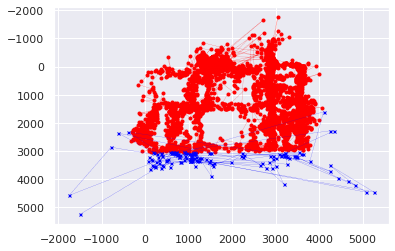

In [4]:
df1 = find_outliers(df)

In [5]:
df1 = clean_dataframe(df1)
df1.head(5)

,node_id,timestamp,x,y,dayofweek,current_hour
0,1,2020-06-24 15:20:08.533,2762,-257,2,8
1,1,2020-06-24 15:20:08.620,2870,-344,2,8
2,1,2020-06-24 15:20:09.623,2916,-344,2,8
3,1,2020-06-24 15:20:09.623,2894,-254,2,8
4,1,2020-06-24 15:20:10.116,2888,-188,2,8


In [6]:
grid_size = 50
df1 = xy_to_grid(df1, df1.x, df1.y, grid_size)
df1

,node_id,timestamp,x,y,dayofweek,current_hour,x_grid,y_grid,grid_id
0,1,2020-06-24 15:20:08.533,2762,-257,2,8,35,15,785
1,1,2020-06-24 15:20:08.620,2870,-344,2,8,36,14,736
2,1,2020-06-24 15:20:09.623,2916,-344,2,8,36,14,736
3,1,2020-06-24 15:20:09.623,2894,-254,2,8,36,15,786
4,1,2020-06-24 15:20:10.116,2888,-188,2,8,36,16,836
...,...,...,...,...,...,...,...,...,...
9623,1,2020-06-29 13:19:16.418,1301,-120,0,6,18,17,868
9624,1,2020-06-29 13:19:25.418,1301,-119,0,6,18,17,868
9625,1,2020-06-29 13:19:35.418,1305,-112,0,6,18,17,868
9626,1,2020-06-29 13:19:45.418,1305,-112,0,6,18,17,868


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
X = df1[['x_grid', 'y_grid']]

In [9]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")


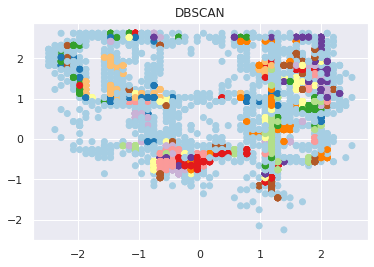

In [20]:
dbscan(X, 0.05, 5)